In [1]:
%matplotlib notebook
from CameraNetwork.transformation_matrices import euler_matrix, euler_from_matrix
from CameraNetwork.utils import object_direction
import cv2
import ephem
import fisheye
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import pandas as pd
import sklearn
from sklearn.base import BaseEstimator
from sklearn import linear_model

h:\amit\studies\cameranetwork\CameraNetwork\transformation_matrices.py:1899: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


In [2]:
CAMERA = 105
fe = fisheye.load_model('data/sun_positions_{}/.calibration_data.dat'.format(CAMERA), calib_img_shape=(1200, 1600))
calibration_paths = glob.glob(r'data\sun_positions_{}\calibration_imgs\*.jpg'.format(CAMERA))

In [3]:
fe_new = fisheye.FishEye(nx=9, ny=6)

In [4]:
rms, K, D, rvecs, tvecs = fe_new.calibrate(img_paths=calibration_paths, show_imgs=True)

<IPython.core.display.Javascript object>


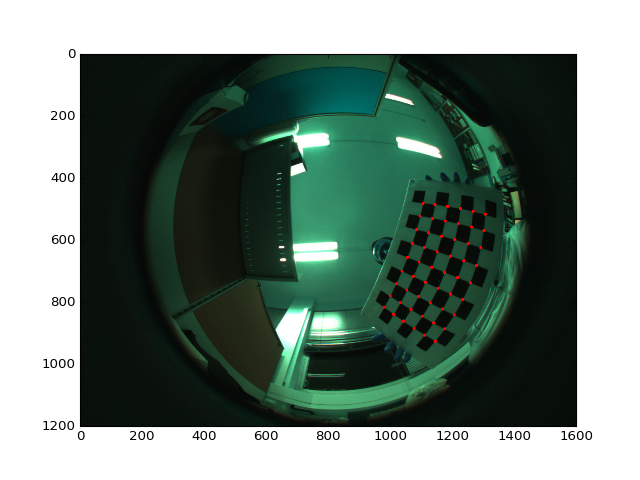

<IPython.core.display.Javascript object>


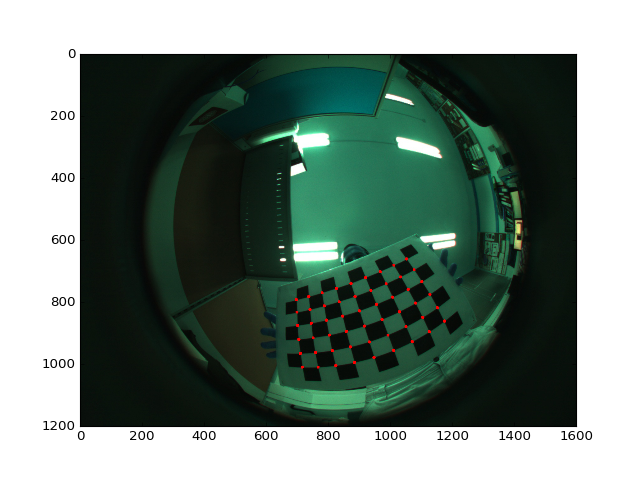

<IPython.core.display.Javascript object>


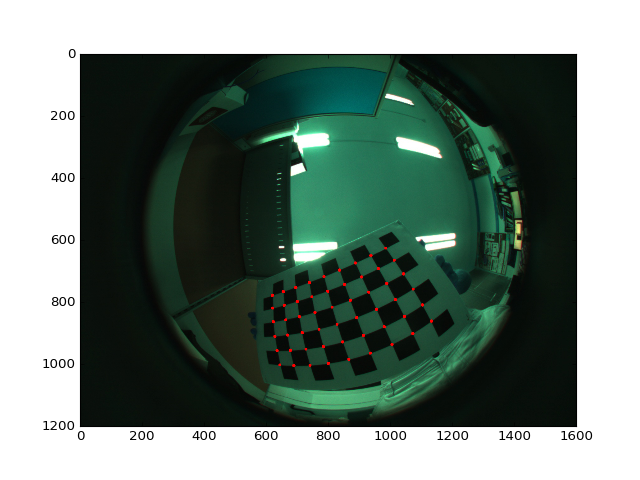

<IPython.core.display.Javascript object>


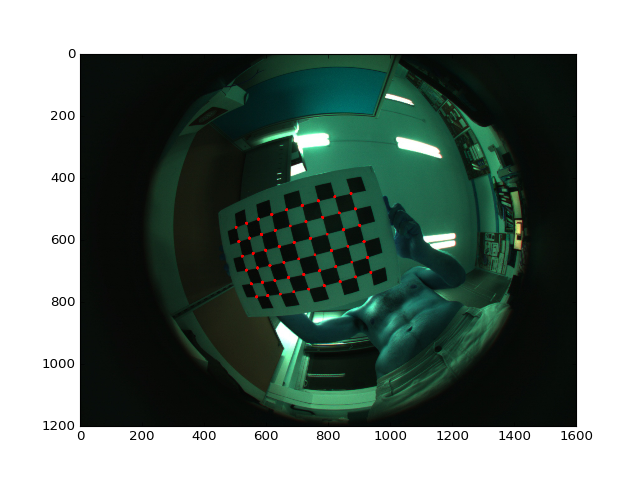

<IPython.core.display.Javascript object>


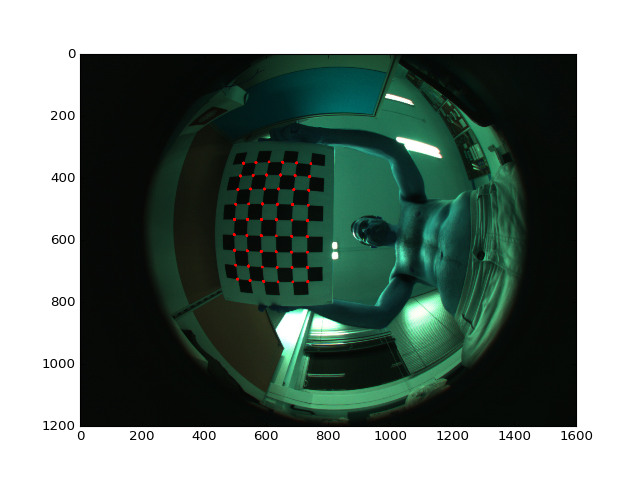

In [5]:
fe_new = fisheye.load_model('data/sun_positions_{}/.calibration_data.dat'.format(CAMERA), calib_img_shape=(1200, 1600))
nx, ny = 9, 6
chessboard_model = np.zeros((1, nx*ny, 3), np.float32)
chessboard_model[0, :, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

for i in range(5):
    img = cv2.imread(calibration_paths[i])
    pts = fe_new.projectPoints(chessboard_model, rvec=rvecs[i], tvec=tvecs[i])
    for pt in pts:
        cv2.circle(img, (pt[0], pt[1]), 5, (0,0,255), -1)
    plt.figure()
    plt.imshow(img[...,::-1])

In [ ]:
K